In [18]:
import numpy as np
from scipy import stats # Used for mode calculation and kurtosis/skewness
import matplotlib.pyplot as plt

# Test the Histogram Plot


Successfully generated 1000 random numbers following a normal distribution.

--- Statistics of Simulated Final Option Prices (ST) ---
Mean:               		-0.0009 	(Target: 0)
Median:             		0.0203
Mode (Approx):      		0.2173
Std Deviation:      		0.9603 		(Target: 1)
Skewness:           		-0.0953
Kurtosis (Pearson): 		3.0960
Excess Kurtosis (Fisher):	0.0960


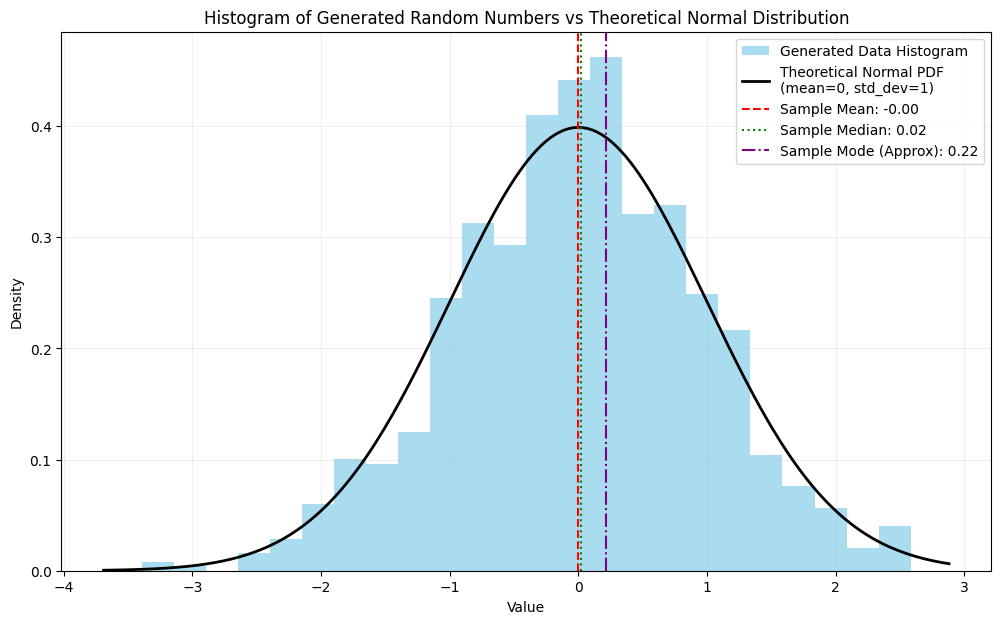

In [19]:
def generate_normal_numbers(mean, std_dev, size=1000):
  if std_dev <= 0:
    raise ValueError("Standard deviation must be a positive value.")

  # loc => mean, scale => SD.
  random_numbers = np.random.normal(loc=mean, scale=std_dev, size=size)
  return random_numbers


try:
  #Input
  user_mean = 0
  user_std_dev = 1
  num_samples = 1000

  # Generating
  generated_data = generate_normal_numbers(user_mean, user_std_dev, num_samples)

  # Output
  print(f"\nSuccessfully generated {num_samples} random numbers following a normal distribution.")

  # Statistic data
  actual_mean = np.mean(generated_data)
  actual_median = np.median(generated_data)
  actual_std_dev = np.std(generated_data)
  actual_skewness = stats.skew(generated_data)
  actual_kurtosis_pearson = stats.kurtosis(generated_data, fisher=False)
  actual_excess_kurtosis = stats.kurtosis(generated_data, fisher=True)

  # Calculate mode from histogram bins for visualization (more robust for continuous data)
  hist, bin_edges = np.histogram(generated_data, bins='auto') # Use automatic binning
  bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
  actual_mode_approx = bin_centers[np.argmax(hist)] # Center of the highest bin
  
  # Print Statistics
  print("\n--- Statistics of Simulated Final Option Prices (ST) ---")
  print(f"Mean:               \t\t{actual_mean:.4f} \t(Target: {user_mean})")
  print(f"Median:             \t\t{actual_median:.4f}")
  print(f"Mode (Approx):      \t\t{actual_mode_approx:.4f}")
  print(f"Std Deviation:      \t\t{actual_std_dev:.4f} \t\t(Target: {user_std_dev})")
  print(f"Skewness:           \t\t{actual_skewness:.4f}")
  print(f"Kurtosis (Pearson): \t\t{actual_kurtosis_pearson:.4f}")
  print(f"Excess Kurtosis (Fisher):\t{actual_excess_kurtosis:.4f}")

  # Histogram Ploting
  plt.figure(figsize=(12, 7))
  count, bins, ignored = plt.hist(generated_data, bins='auto', density=True, alpha=0.7, label='Generated Data Histogram', color='skyblue')

  # Plot the theoretical Normal Probability Density Function (PDF)
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 200) # Increased points for smoother curve
  # Normal PDF formula: 1/(sigma*sqrt(2*pi)) * exp(-(x-mu)^2 / (2*sigma^2))
  pdf = stats.norm.pdf(x, user_mean, user_std_dev)
  plt.plot(x, pdf, 'k', linewidth=2, label=f'Theoretical Normal PDF\n(mean={user_mean}, std_dev={user_std_dev})')

  # Add vertical lines for calculated Mean, Median, and Mode of the sample
  plt.axvline(actual_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Sample Mean: {actual_mean:.2f}')
  plt.axvline(actual_median, color='green', linestyle='dotted', linewidth=1.5, label=f'Sample Median: {actual_median:.2f}')
  plt.axvline(actual_mode_approx, color='purple', linestyle='dashdot', linewidth=1.5, label=f'Sample Mode (Approx): {actual_mode_approx:.2f}')

  plt.title('Histogram of Generated Random Numbers vs Theoretical Normal Distribution')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True, alpha=0.2)
  plt.show()


except ValueError as e:
  print(f"Error: Invalid input - {e}")
except ImportError:
  print("Error: Required libraries (NumPy, SciPy, Matplotlib) not found. Please install them using:")
  print("pip install numpy scipy matplotlib")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

## Construct the Bownian Motion with shock(diffusion)

Simulated 20 option price paths using Geometric Brownian Motion.
Parameters: S0=100, r=0.05, sigma=0.2, T=1
Number of time steps: 64


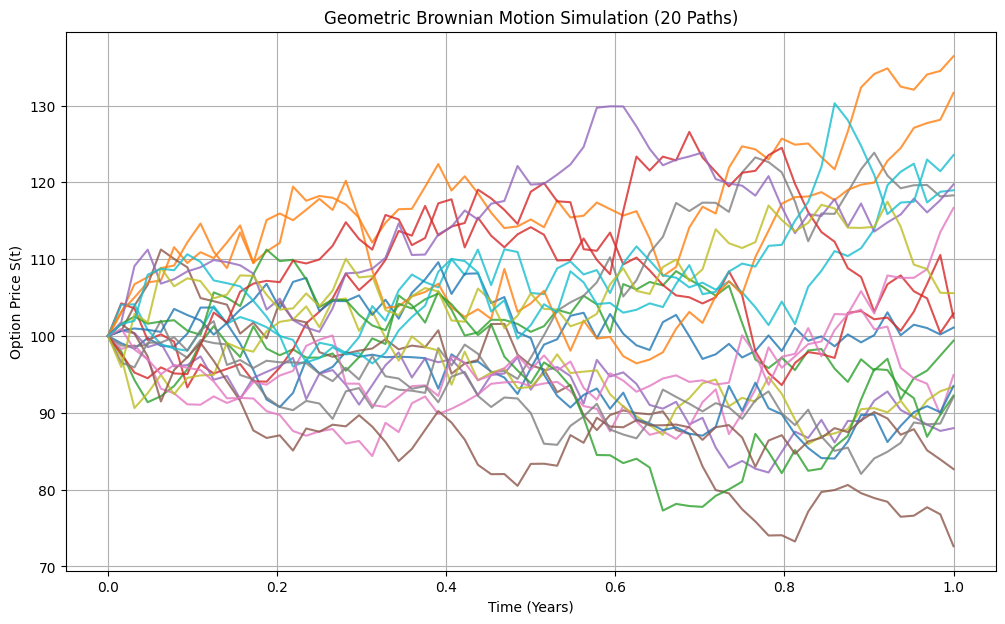


Simulated final prices (at T=1 year):
Average final price across 20 paths: 104.3034

--- How this relates to your code ---
1. This code simulates the *entire sequence* of prices from t=0 to t=T for multiple paths.
2. The randomness at each step comes from 'dW', which represents the increment of a Brownian motion scaled by sqrt(dt). These increments are normally distributed.
3. The first cell of your notebook calculated *only the final price* (ST) directly. This is mathematically equivalent to the endpoint of these paths if you use a large number of simulations.
4. The later cells in your notebook replaced the standard normal random numbers ('Z') with numbers from a Johnson SU distribution to control skewness and kurtosis. While useful for certain modeling scenarios, this means those simulations were *not* based on standard Brownian motion (which implies normally distributed increments).


In [20]:
# --- Parameters (from your notebook) ---
S0 = 100       # Initial option price
r = 0.05       # Risk-free interest rate
sigma = 0.2    # Volatility
T = 1          # Time to maturity in years

# --- Simulation Setup ---
n_sim = 20     # Number of simulation paths
n_steps = 64  # Number of time steps within the years
dt = T / n_steps # Size of each time step

# --- Brownian Motion Simulation ---
Z = np.random.standard_normal(size=(n_steps, n_sim))
dW = Z * np.sqrt(dt) # Scaled Brownian increments

# --- Geometric Brownian Motion (GBM) Path Simulation ---
# Initialize array to store the paths
S_paths = np.zeros((n_steps + 1, n_sim))
S_paths[0, :] = S0 # Set initial price S0 for all paths at time t=0

# Simulate step-by-step
for t in range(1, n_steps + 1):
    # GBM formula: S(t) = S(t-1) * exp( (r - 0.5*sigma^2)*dt + sigma*dW(t) )
    drift = (r - 0.5 * sigma**2) * dt
    diffusion = sigma * dW[t-1, :] # Use the dW calculated for this step
    S_paths[t, :] = S_paths[t-1, :] * np.exp(drift + diffusion)

# --- Output and Visualization ---
print(f"Simulated {n_sim} option price paths using Geometric Brownian Motion.")
print(f"Parameters: S0={S0}, r={r}, sigma={sigma}, T={T}")
print(f"Number of time steps: {n_steps}")

# Plot the simulated paths
plt.figure(figsize=(12, 7))
time_points = np.linspace(0, T, n_steps + 1)

# Plot each simulated path
plt.plot(time_points, S_paths, lw=1.5, alpha=0.8)

plt.title(f'Geometric Brownian Motion Simulation ({n_sim} Paths)')
plt.xlabel('Time (Years)')
plt.ylabel('Option Price S(t)')
plt.grid(True)
plt.show()

# Display the final prices from the simulation paths
final_prices = S_paths[-1, :]
print("\nSimulated final prices (at T=1 year):")
# print(final_prices) # Uncomment to see all final prices
print(f"Average final price across {n_sim} paths: {np.mean(final_prices):.4f}")

# --- Explanation ---
print("\n--- How this relates to your code ---")
print("1. This code simulates the *entire sequence* of prices from t=0 to t=T for multiple paths.")
print("2. The randomness at each step comes from 'dW', which represents the increment of a Brownian motion scaled by sqrt(dt). These increments are normally distributed.")
print("3. The first cell of your notebook calculated *only the final price* (ST) directly. This is mathematically equivalent to the endpoint of these paths if you use a large number of simulations.")
print("4. The later cells in your notebook replaced the standard normal random numbers ('Z') with numbers from a Johnson SU distribution to control skewness and kurtosis. While useful for certain modeling scenarios, this means those simulations were *not* based on standard Brownian motion (which implies normally distributed increments).")


--- Analyzing Distribution of Final Option Prices ($S_T$) ---
Running a new simulation with n_sim = 100000 paths.


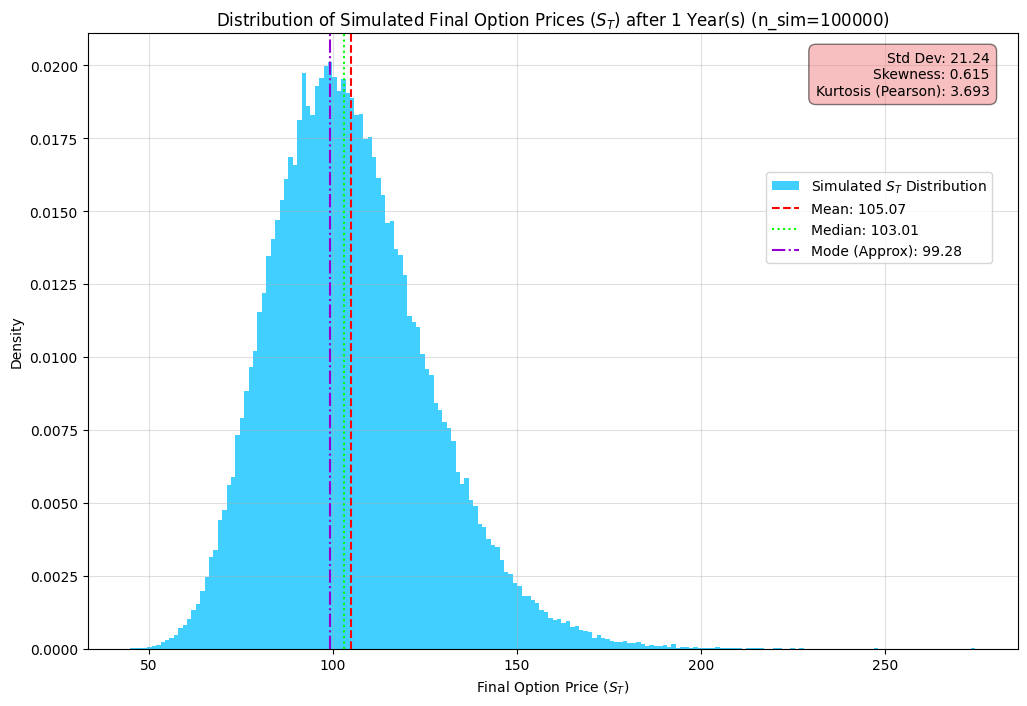


--- Statistics of Simulated Final Option Prices (ST) ---
Number of Simulations for Distribution: 100000
Mean:           		105.0701
Median:         		103.0055
Mode (Approx):  		99.2807
Std Deviation:  		21.2404
Skewness:       		0.6148
Kurtosis (Pearson): 		3.6926
Excess Kurtosis (Fisher):	0.6926

Reminder: The final Option price ST under standard GBM follows a log-normal distribution.


In [21]:
# Parameters S0, r, sigma, T should be inherited from previously executed cells.

# Define the number of simulations
n_sim_dist = 100000

print(f"\n--- Analyzing Distribution of Final Option Prices ($S_T$) ---")
print(f"Running a new simulation with n_sim = {n_sim_dist} paths.")

# --- Simulate Final Option Prices (ST) using Standard GBM ---
Z_dist = np.random.standard_normal(n_sim_dist)
drift_term_dist = (r - 0.5 * sigma**2) * T
diffusion_term_dist = sigma * np.sqrt(T) * Z_dist
final_prices_ST_dist = S0 * np.exp(drift_term_dist + diffusion_term_dist)

# --- Calculate Statistics for the Simulated Final Prices (ST) ---
mean_ST = np.mean(final_prices_ST_dist)
median_ST = np.median(final_prices_ST_dist)
std_dev_ST = np.std(final_prices_ST_dist)
skewness_ST = stats.skew(final_prices_ST_dist)
kurtosis_ST_pearson = stats.kurtosis(final_prices_ST_dist, fisher=False)
kurtosis_ST_fisher = stats.kurtosis(final_prices_ST_dist, fisher=True)

# Calculate approximate mode from histogram bins for visualization
hist_counts, bin_edges = np.histogram(final_prices_ST_dist, bins='auto')
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
mode_ST_approx = bin_centers[np.argmax(hist_counts)]

# --- Create the Distribution Plot ---
plt.figure(figsize=(12, 8))

# Plot histogram
plt.hist(final_prices_ST_dist, bins='auto', density=True, alpha=0.75, label='Simulated $S_T$ Distribution', color='deepskyblue') # Changed color slightly

# Add vertical lines for Mean, Median, Mode
plt.axvline(mean_ST, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_ST:.2f}')
plt.axvline(median_ST, color='lime', linestyle='dotted', linewidth=1.5, label=f'Median: {median_ST:.2f}') # Changed color slightly
plt.axvline(mode_ST_approx, color='darkviolet', linestyle='dashdot', linewidth=1.5, label=f'Mode (Approx): {mode_ST_approx:.2f}') # Changed color slightly

# Add text box for other statistics
stats_text = (
    f"Std Dev: {std_dev_ST:.2f}\n"
    f"Skewness: {skewness_ST:.3f}\n"
    f"Kurtosis (Pearson): {kurtosis_ST_pearson:.3f}"
)
# Place text box, ensuring it doesn't overlap legend too much
plt.text(0.97, 0.97, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.5', fc='lightcoral', alpha=0.5)) # Changed color slightly

plt.title(f'Distribution of Simulated Final Option Prices ($S_T$) after {T} Year(s) (n_sim={n_sim_dist})')
plt.xlabel('Final Option Price ($S_T$)')
plt.ylabel('Density')
# Adjust legend position if needed based on text box placement
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.7))
plt.grid(True, alpha=0.4)
plt.show()

# --- Print Statistics ---
print("\n--- Statistics of Simulated Final Option Prices (ST) ---")
print(f"Number of Simulations for Distribution: {n_sim_dist}")
print(f"Mean:           \t\t{mean_ST:.4f}")
print(f"Median:         \t\t{median_ST:.4f}")
print(f"Mode (Approx):  \t\t{mode_ST_approx:.4f}")
print(f"Std Deviation:  \t\t{std_dev_ST:.4f}")
print(f"Skewness:       \t\t{skewness_ST:.4f}")
print(f"Kurtosis (Pearson): \t\t{kurtosis_ST_pearson:.4f}")
print(f"Excess Kurtosis (Fisher):\t{kurtosis_ST_fisher:.4f}")

print("\nReminder: The final Option price ST under standard GBM follows a log-normal distribution.")